## Imports

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
%matplotlib inline

# Importing libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date

In [4]:
import seaborn

In [5]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [6]:
import sys, pickle
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model       import Lasso
from sklearn.ensemble           import RandomForestRegressor
from sklearn.ensemble           import ExtraTreesRegressor
from sklearn.model_selection    import GridSearchCV
from sklearn.metrics            import r2_score
import xgboost
from xgboost                    import XGBRegressor

## Loading the dataset into a DataFrame

In [7]:
seoul_bike = pd.read_csv("SeoulBikeData.csv", encoding= 'unicode_escape')
seoul_bike

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


## Quick Analysis with Panda

Counting has been made during a year, from 01-12-2017 to 30-11-2018.

In [8]:
seoul_bike.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [9]:
seoul_bike.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [10]:
nb_lignes, nb_col = seoul_bike.shape
print(nb_lignes)
print(nb_col)

8760
14


There is 8760 collected data with 14 features. And here are the features names :

In [11]:
seoul_bike.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

#### Data Information :

- Date: day-month-year format
- Rented Bike count: Count of bikes rented at each hour (target)
- Hour: Hour of the day
- Temperature - Celsius
- Humidity - %
- Windspeed - m/s
- Visibility - 10m
- Dew point temperature - Celsius
- Solar radiation - MJ/m2
- Rainfall - mm
- Snowfall - cm
- Seasons - Winter, Spring, Summer, Autumn
- Holiday - Holiday/No holiday
- Functional Day - No(Non Functional Hours)/Yes(Functional hours)

In [12]:
seoul_bike.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

### Count

There is an amount of 8760 counts for a whole year.

In [13]:
seoul_bike.count()

Date                         8760
Rented Bike Count            8760
Hour                         8760
Temperature(°C)              8760
Humidity(%)                  8760
Wind speed (m/s)             8760
Visibility (10m)             8760
Dew point temperature(°C)    8760
Solar Radiation (MJ/m2)      8760
Rainfall(mm)                 8760
Snowfall (cm)                8760
Seasons                      8760
Holiday                      8760
Functioning Day              8760
dtype: int64

### Filter

Collected data concerning summer season.

In [14]:
seoul_bike[seoul_bike.Seasons == "Summer"]


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
4368,01/06/2018,963,0,20.1,63,1.1,1698,12.8,0.00,0.0,0.0,Summer,No Holiday,Yes
4369,01/06/2018,776,1,19.5,65,0.4,1662,12.7,0.00,0.0,0.0,Summer,No Holiday,Yes
4370,01/06/2018,554,2,19.0,72,1.4,1258,13.8,0.00,0.0,0.0,Summer,No Holiday,Yes
4371,01/06/2018,366,3,18.6,72,1.4,1340,13.4,0.00,0.0,0.0,Summer,No Holiday,Yes
4372,01/06/2018,265,4,18.1,76,1.8,561,13.7,0.00,0.0,0.0,Summer,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6571,31/08/2018,2372,19,26.5,69,2.3,2000,20.3,0.18,0.0,0.0,Summer,No Holiday,Yes
6572,31/08/2018,1995,20,25.4,74,1.6,2000,20.4,0.00,0.0,0.0,Summer,No Holiday,Yes
6573,31/08/2018,1931,21,24.5,78,1.2,2000,20.4,0.00,0.0,0.0,Summer,No Holiday,Yes
6574,31/08/2018,1789,22,24.1,80,0.9,1852,20.4,0.00,0.0,0.0,Summer,No Holiday,Yes


Collected data concerning days with temperature higher than 20°C.

In [15]:
seoul_bike[seoul_bike["Temperature(°C)"] > 20]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
2485,14/03/2018,789,13,20.9,44,4.7,1795,8.1,2.66,0.0,0.0,Spring,No Holiday,Yes
2486,14/03/2018,878,14,21.1,42,4.3,2000,7.6,2.49,0.0,0.0,Spring,No Holiday,Yes
2487,14/03/2018,1025,15,21.7,39,3.3,1979,7.1,2.09,0.0,0.0,Spring,No Holiday,Yes
2488,14/03/2018,1049,16,21.7,41,3.2,2000,7.8,1.91,0.0,0.0,Spring,No Holiday,Yes
2489,14/03/2018,1325,17,20.5,49,3.5,2000,9.4,1.18,0.0,0.0,Spring,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7814,22/10/2018,1122,14,20.6,30,2.2,839,2.3,1.69,0.0,0.0,Autumn,No Holiday,Yes
7815,22/10/2018,1167,15,20.2,31,1.6,855,2.5,1.25,0.0,0.0,Autumn,No Holiday,Yes
7886,25/10/2018,1192,14,20.6,31,1.4,1562,2.8,1.70,0.0,0.0,Autumn,No Holiday,Yes
7887,25/10/2018,1275,15,20.6,32,1.4,1651,3.3,1.40,0.0,0.0,Autumn,No Holiday,Yes


### Sort

The five hotest days :

In [16]:
seoul_bike.sort_values(by="Temperature(°C)")[-5:]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
5825,31/07/2018,1184,17,38.0,36,1.3,1989,20.3,2.03,0.0,0.0,Summer,No Holiday,Yes
5846,01/08/2018,475,14,38.7,38,2.4,1943,21.8,3.12,0.0,0.0,Summer,No Holiday,Yes
5849,01/08/2018,1033,17,39.0,41,2.6,1881,23.3,1.83,0.0,0.0,Summer,No Holiday,Yes
5847,01/08/2018,531,15,39.3,37,2.3,1892,21.9,2.82,0.0,0.0,Summer,No Holiday,Yes
5848,01/08/2018,561,16,39.4,39,2.5,1897,22.8,2.42,0.0,0.0,Summer,No Holiday,Yes


The five coldest days :

In [17]:
seoul_bike.sort_values(by="Temperature(°C)")[:5]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
1352,26/01/2018,322,8,-17.8,40,2.5,2000,-28.1,0.00,0.0,0.5,Winter,No Holiday,Yes
1353,26/01/2018,149,9,-17.5,37,3.8,1941,-28.7,0.21,0.0,0.5,Winter,No Holiday,Yes
1351,26/01/2018,142,7,-17.5,38,3.4,2000,-28.4,0.00,0.0,0.5,Winter,No Holiday,Yes
1350,26/01/2018,64,6,-17.4,40,1.6,2000,-27.7,0.00,0.0,0.5,Winter,No Holiday,Yes
1349,26/01/2018,36,5,-16.9,38,2.3,2000,-27.9,0.00,0.0,0.5,Winter,No Holiday,Yes


The five hotest days of Autumn :

In [18]:
seoul_bike[seoul_bike.Seasons == "Autumn"].sort_values(by="Temperature(°C)")[-5:]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
6589,01/09/2018,1303,13,29.4,48,1.9,1942,17.2,2.88,0.0,0.0,Autumn,No Holiday,Yes
6593,01/09/2018,1845,17,29.6,42,1.3,2000,15.3,0.98,0.0,0.0,Autumn,No Holiday,Yes
6590,01/09/2018,1371,14,29.7,42,1.4,2000,15.4,2.37,0.0,0.0,Autumn,No Holiday,Yes
6591,01/09/2018,1480,15,30.0,45,0.9,2000,16.7,2.10,0.0,0.0,Autumn,No Holiday,Yes
6592,01/09/2018,1678,16,30.5,41,1.4,1930,15.7,1.95,0.0,0.0,Autumn,No Holiday,Yes


The five coldest days of Autumn :

In [19]:
seoul_bike[seoul_bike.Seasons == "Autumn"].sort_values(by="Temperature(°C)", ascending=False)[-5:]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8572,23/11/2018,109,4,-2.0,42,0.7,2000,-13.2,0.00,0.0,0.0,Autumn,No Holiday,Yes
8573,23/11/2018,129,5,-2.4,37,0.5,2000,-15.1,0.00,0.0,0.0,Autumn,No Holiday,Yes
8574,23/11/2018,339,6,-2.6,40,1.4,2000,-14.3,0.00,0.0,0.0,Autumn,No Holiday,Yes
8575,23/11/2018,727,7,-2.8,42,1.3,2000,-13.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
8576,23/11/2018,1516,8,-3.0,43,1.1,2000,-13.8,0.03,0.0,0.0,Autumn,No Holiday,Yes


### Aggregate

Data is collected every hour, so there is 24 collections per day.  
365 days and 365x24=8760 colleted data.

In [20]:
seoul_bike.groupby("Date")["Rented Bike Count"].count()

Date
01/01/2018    24
01/02/2018    24
01/03/2018    24
01/04/2018    24
01/05/2018    24
              ..
31/05/2018    24
31/07/2018    24
31/08/2018    24
31/10/2018    24
31/12/2017    24
Name: Rented Bike Count, Length: 365, dtype: int64

Data is more collected during Spring and Summer.

In [21]:
seoul_bike.groupby("Seasons")["Rented Bike Count"].count().sort_values()

Seasons
Winter    2160
Autumn    2184
Spring    2208
Summer    2208
Name: Rented Bike Count, dtype: int64

Despite that, bikes are more rented during Autumn than during Spring.

In [22]:
seoul_bike.groupby("Seasons")["Rented Bike Count"].sum().sort_values()

Seasons
Winter     487169
Spring    1611909
Autumn    1790002
Summer    2283234
Name: Rented Bike Count, dtype: int64

## Data Cleaning 

It seems that there is no inexistent information. Let's make sure of that.

In [23]:
seoul_bike.isna()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8756,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8757,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8758,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
seoul_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
Date                         8760 non-null object
Rented Bike Count            8760 non-null int64
Hour                         8760 non-null int64
Temperature(°C)              8760 non-null float64
Humidity(%)                  8760 non-null int64
Wind speed (m/s)             8760 non-null float64
Visibility (10m)             8760 non-null int64
Dew point temperature(°C)    8760 non-null float64
Solar Radiation (MJ/m2)      8760 non-null float64
Rainfall(mm)                 8760 non-null float64
Snowfall (cm)                8760 non-null float64
Seasons                      8760 non-null object
Holiday                      8760 non-null object
Functioning Day              8760 non-null object
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ KB


**Total count of missing values**  
Here we have no missing values for this data frame.

In [25]:
seoul_bike.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Check to see if we have any missing values at all:

In [26]:

seoul_bike.isnull().values.any()

False

**Total count of improper values**  
Here we have no undesirable values for this data frame.

In [27]:
seoul_bike.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**Only zeros values ?**  
Here we have no columns with only zeros.

In [28]:
seoul_bike['Rainfall(mm)'].unique()

array([ 0. ,  0.5,  1. ,  2.5,  0.1,  0.2,  0.3,  0.7,  1.6,  0.4,  1.1,
        6.4,  9.5,  3.5,  0.9,  3.3,  1.4,  1.5,  3.7,  4.5,  9. ,  2. ,
        8. , 17. ,  7. ,  3. ,  1.9,  0.8,  4. ,  6. ,  5. ,  5.5,  2.4,
       35. , 19. , 13.5, 10. , 12.5, 11.5,  5.4, 10.5,  6.5, 16. , 14.5,
        4.9, 21.5, 12. , 18.5,  7.5, 24. ,  8.5,  7.3,  1.3, 15.5, 29.5,
       21. , 13. ,  1.2, 18. ,  9.1,  1.8])

In [29]:
seoul_bike['Snowfall (cm)'].unique()

array([0. , 0.1, 0.3, 0.4, 0.2, 1. , 0.9, 0.8, 0.7, 0.6, 2.7, 4. , 4.1,
       4.3, 3.9, 3.1, 2.1, 1.4, 0.5, 1.3, 1.8, 2. , 4.8, 5.1, 5. , 4.2,
       3.2, 2.6, 2.5, 2.3, 2.2, 1.9, 1.7, 1.6, 2.4, 1.2, 1.1, 3. , 3.3,
       3.5, 3.4, 2.8, 1.5, 3.8, 3.7, 7.1, 8.8, 7. , 6. , 3.6, 2.9])

In [30]:
seoul_bike['Solar Radiation (MJ/m2)'].unique()

array([0.  , 0.01, 0.23, 0.65, 0.94, 1.11, 1.16, 1.01, 0.54, 0.24, 0.08,
       0.3 , 0.8 , 1.  , 1.09, 1.12, 0.99, 0.74, 0.22, 0.06, 0.02, 0.25,
       0.43, 0.6 , 0.69, 0.53, 0.2 , 0.05, 0.64, 1.17, 0.88, 0.55, 0.18,
       0.21, 0.63, 0.93, 1.08, 1.1 , 0.96, 0.72, 0.36, 0.1 , 0.14, 0.41,
       0.98, 1.14, 1.04, 0.84, 0.51, 0.15, 1.22, 0.87, 0.56, 0.61, 0.89,
       1.05, 1.13, 1.06, 0.4 , 0.03, 0.28, 0.35, 0.62, 1.26, 1.24, 0.92,
       0.58, 0.19, 1.23, 0.13, 0.52, 0.48, 0.09, 0.34, 0.42, 0.32, 0.86,
       1.07, 0.17, 0.85, 0.47, 0.57, 0.91, 0.71, 0.12, 0.67, 0.77, 0.78,
       0.16, 0.66, 0.38, 0.11, 0.04, 0.07, 1.18, 0.9 , 0.33, 0.75, 0.59,
       0.29, 0.81, 0.83, 0.39, 1.15, 1.03, 0.95, 0.76, 1.02, 0.26, 0.5 ,
       0.27, 0.73, 0.46, 0.31, 1.2 , 1.19, 0.45, 0.49, 0.79, 0.44, 0.68,
       1.27, 1.25, 1.21, 0.7 , 1.28, 1.3 , 1.29, 0.82, 1.65, 2.04, 2.25,
       2.18, 1.91, 1.42, 1.57, 1.99, 2.22, 2.17, 1.89, 1.4 , 1.73, 2.12,
       2.29, 2.23, 1.94, 1.44, 1.72, 2.09, 2.3 , 2.

In [31]:
seoul_bike.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

**Data Types Check**  
Let's convert all the *object* data :  
Date -> DateTime.  
Seasons -> Categorical: 1 (Winter), 2 (Spring), 3 (Summer), 4 (Autumn)  
Holiday -> Categorical: 0 (No Holiday), 1 (Holiday)  
Functioning Day -> Categorical: 0 (No), 1 (Yes)  

In [32]:
seoul_bike['Date'] = pd.to_datetime(seoul_bike['Date'], format='%d/%m/%Y')
seoul_bike['Seasons'] = seoul_bike['Seasons'].apply(lambda x: 1 if x == 'Winter' else 2 if x == 'Spring' else 3 if x == 'Summer' else 4)
seoul_bike['Holiday'] = seoul_bike['Holiday'].apply(lambda x: 0 if x == 'No Holiday' else 1)
seoul_bike['Functioning Day'] = seoul_bike['Functioning Day'].apply(lambda x: 0 if x == 'No' else 1)


In [33]:
seoul_bike

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,4,0,1
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,4,0,1
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,4,0,1
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,4,0,1


In [34]:
seoul_bike['Month']=pd.DatetimeIndex(seoul_bike['Date']).month
seoul_bike['Day']=pd.DatetimeIndex(seoul_bike['Date']).day
seoul_bike['Year']=pd.DatetimeIndex(seoul_bike['Date']).year
seoul_bike['Weekday']=pd.DatetimeIndex(seoul_bike['Date']).dayofweek
seoul_bike['Weekday']=seoul_bike['Weekday'].apply(lambda x: x+1)
seoul_bike

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,Year,Weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0,1,12,1,2017,5
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,1,12,1,2017,5
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0,1,12,1,2017,5
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0,1,12,1,2017,5
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0,1,12,1,2017,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,4,0,1,11,30,2018,5
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,4,0,1,11,30,2018,5
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,4,0,1,11,30,2018,5
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,4,0,1,11,30,2018,5


In [35]:
seoul_bike.head(50)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,Year,Weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,1,0,1,12,1,2017,5
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,1,0,1,12,1,2017,5
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,1,0,1,12,1,2017,5
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,1,0,1,12,1,2017,5
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,1,0,1,12,1,2017,5
5,2017-12-01,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,1,0,1,12,1,2017,5
6,2017-12-01,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,1,0,1,12,1,2017,5
7,2017-12-01,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,1,0,1,12,1,2017,5
8,2017-12-01,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,1,0,1,12,1,2017,5
9,2017-12-01,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,1,0,1,12,1,2017,5


In [36]:
seoul_bike['Weekday'].unique()

array([5, 6, 7, 1, 2, 3, 4], dtype=int64)

In [37]:
seoul_bike = seoul_bike.set_index('Date')

## Data Visualization 

### Daily Evolution of bike rental in Seoul.

**Total of rented bike per day.**

In [38]:
rented_bike_count=pd.DataFrame(seoul_bike['Rented Bike Count'])
rented_bike_count

,Rented Bike Count
Date,
2017-12-01,254
2017-12-01,204
2017-12-01,173
2017-12-01,107
2017-12-01,78
...,...
2018-11-30,1003
2018-11-30,764
2018-11-30,694


In [39]:
rbc_total=rented_bike_count.resample('D').sum()
rbc_mean=rented_bike_count.resample('D').mean()
rbc_med=rented_bike_count.resample('D').median()
rbc_max=rented_bike_count.resample('D').max()
rbc_min=rented_bike_count.resample('D').min()

In [40]:
rbc_total
#rbc_mean
#rbc_max
#rbc_min

,Rented Bike Count
Date,
2017-12-01,9539
2017-12-02,8523
2017-12-03,7222
2017-12-04,8729
2017-12-05,8307
...,...
2018-11-26,17162
2018-11-27,16282
2018-11-28,16524


**During the year**

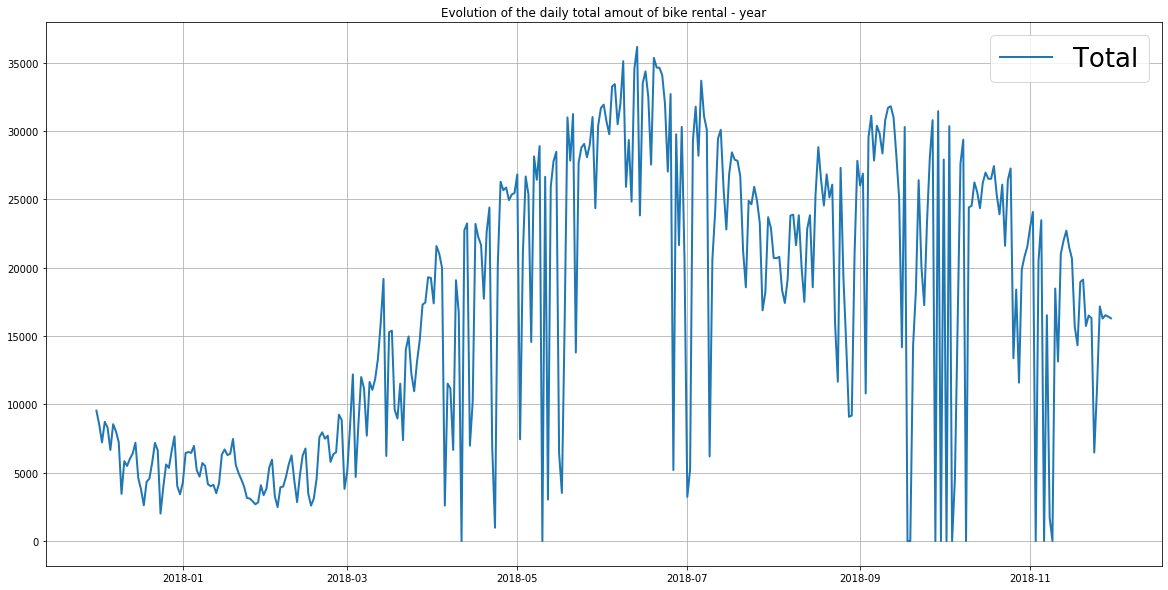

In [41]:
plt.gcf().set_size_inches(20,10)
plt.grid(True)
plt.plot( rbc_total['Rented Bike Count'], linewidth=2, label="Total")
plt.title('Evolution of the daily total amout of bike rental - year')
plt.legend(fontsize=26)
plt.plot()
plt.show()

We can see here that the bike rentals are more numerous during the summer period and the months when the temperatures are quite hot.


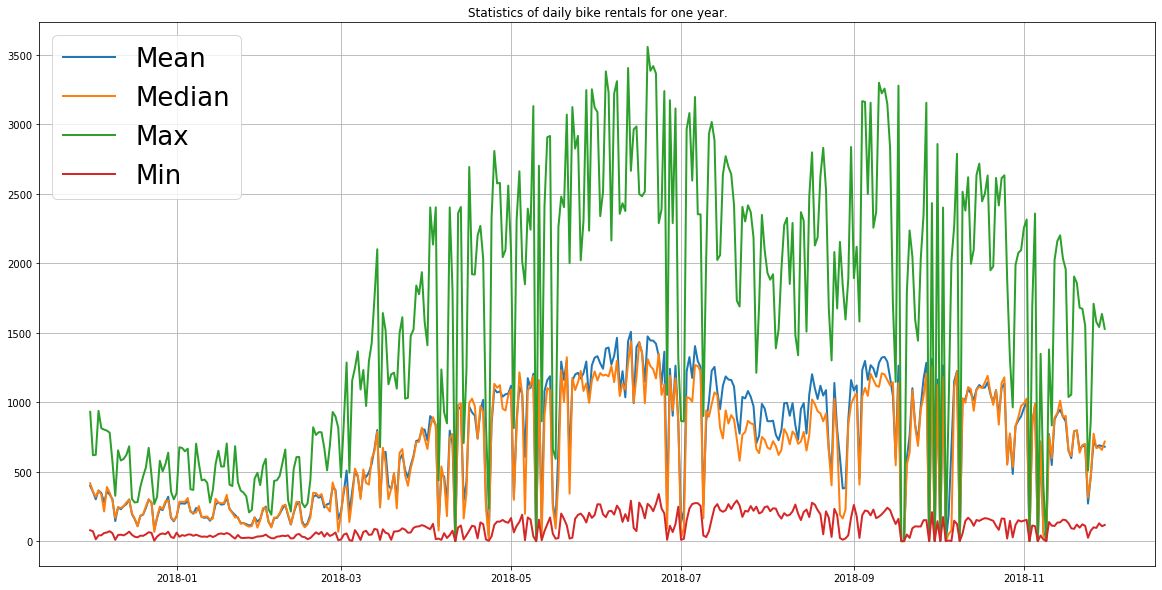

In [42]:
plt.gcf().set_size_inches(20,10)
plt.grid(True)
plt.plot( rbc_mean['Rented Bike Count'], linewidth=2, label="Mean")
plt.plot( rbc_med['Rented Bike Count'], linewidth=2, label="Median")
plt.plot( rbc_max['Rented Bike Count'], linewidth=2, label="Max")
plt.plot( rbc_min['Rented Bike Count'], linewidth=2, label="Min")
plt.title('Statistics of daily bike rentals for one year.')
plt.legend(fontsize=26)
plt.plot()
plt.show()

By looking at the curves of the max, min and average of the bike rentals over the year we can see that there are big differences according to the periods. That's why we're going to look at the number of bike rentals per month and per season. 

**During a particular period**  
*From the 1st of January to the 2nd of February in this example*

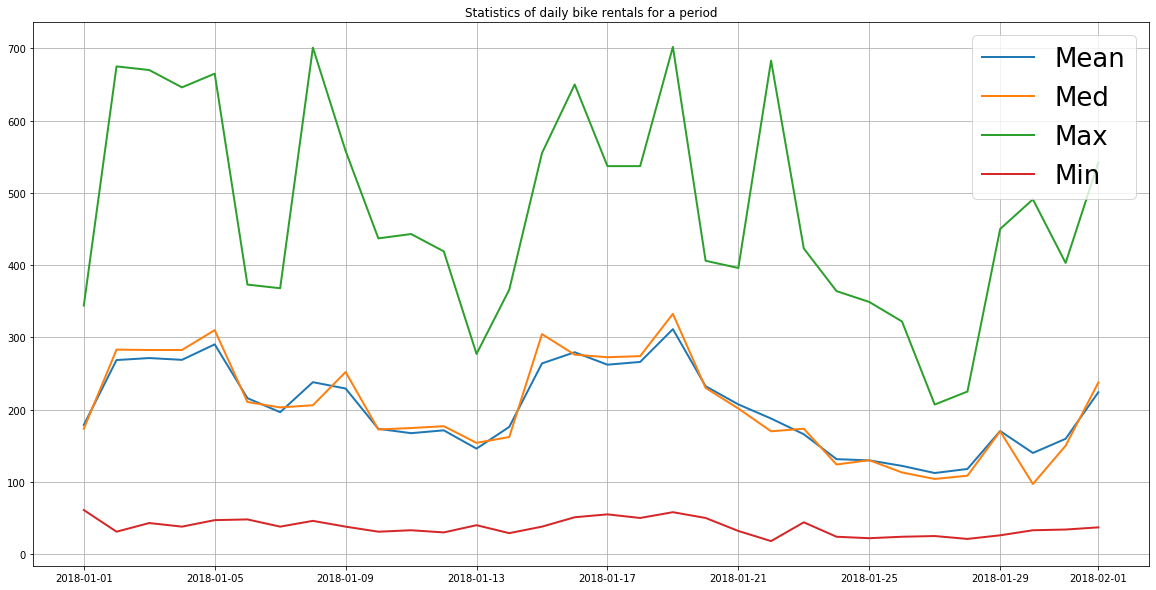

In [43]:
plt.gcf().set_size_inches(20,10)
plt.grid(True)
plt.plot( rbc_mean['Rented Bike Count'].loc['01/01/2018':'02/01/2018'], linewidth=2, label="Mean")
plt.plot( rbc_med['Rented Bike Count'].loc['01/01/2018':'02/01/2018'], linewidth=2, label="Med")
plt.plot( rbc_max['Rented Bike Count'].loc['01/01/2018':'02/01/2018'], linewidth=2, label="Max")
plt.plot( rbc_min['Rented Bike Count'].loc['01/01/2018':'02/01/2018'], linewidth=2, label="Min")
plt.title("Statistics of daily bike rentals for a period")
plt.legend(fontsize=26)
plt.plot()
plt.show()

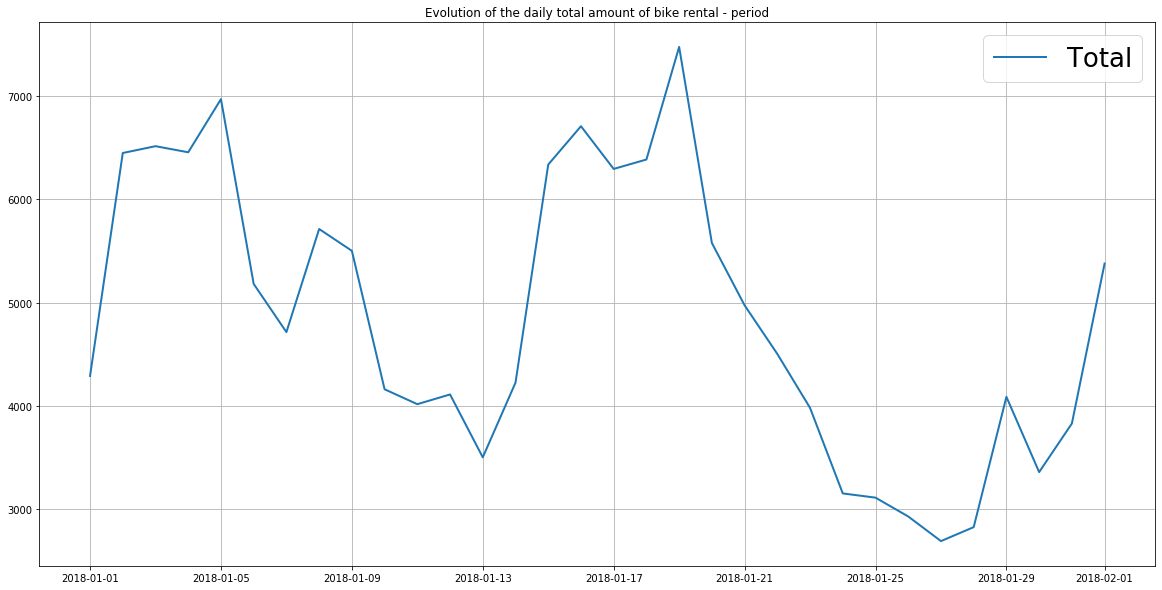

In [44]:
plt.gcf().set_size_inches(20,10)
plt.grid(True)
plt.plot( rbc_total['Rented Bike Count'].loc['01/01/2018':'02/01/2018'], linewidth=2, label="Total")
plt.title("Evolution of the daily total amount of bike rental - period")
plt.legend(fontsize=26)
plt.plot()
plt.show()

**Total of rented bike per day according to the daily mean temperature** 

In [45]:
temperature=pd.DataFrame(seoul_bike['Temperature(°C)'])
temp_mean=temperature.resample('D').mean()
temp_mean

,Temperature(°C)
Date,
2017-12-01,-2.454167
2017-12-02,1.325000
2017-12-03,4.875000
2017-12-04,-0.304167
2017-12-05,-4.458333
...,...
2018-11-26,6.320833
2018-11-27,7.066667
2018-11-28,5.304167


In [46]:
df=pd.concat([rbc_total,temp_mean], axis=1).reset_index()
df

,Date,Rented Bike Count,Temperature(°C)
0,2017-12-01,9539,-2.454167
1,2017-12-02,8523,1.325000
2,2017-12-03,7222,4.875000
3,2017-12-04,8729,-0.304167
4,2017-12-05,8307,-4.458333
...,...,...,...
360,2018-11-26,17162,6.320833
361,2018-11-27,16282,7.066667
362,2018-11-28,16524,5.304167
363,2018-11-29,16423,3.304167


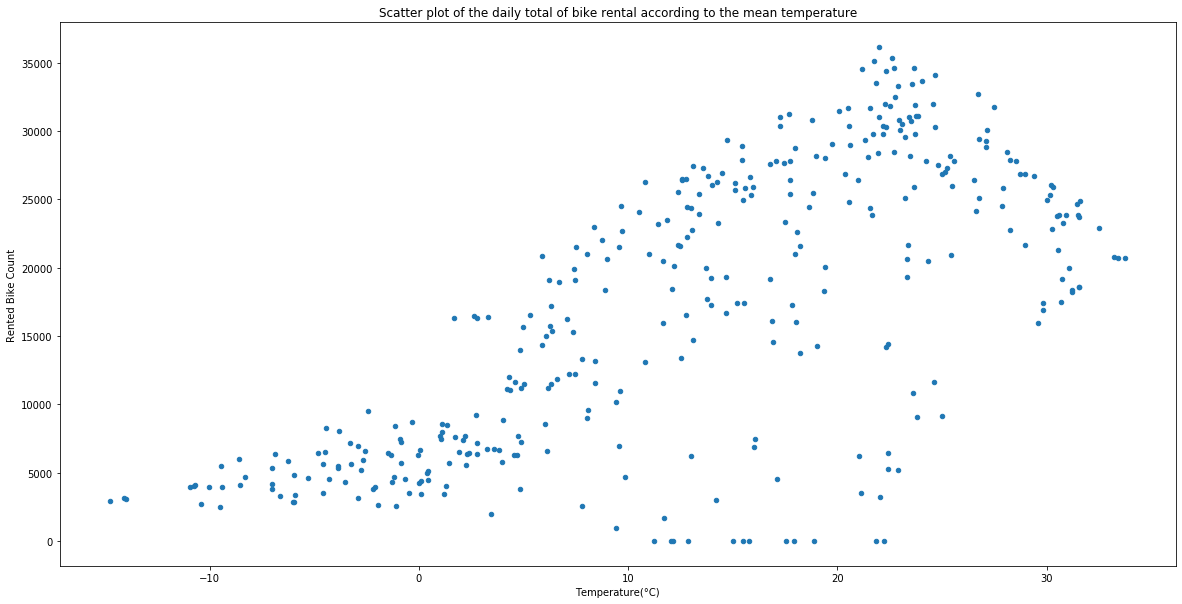

In [47]:
plt.gcf().set_size_inches(20,10)
ax = plt.gca()
df.plot(kind='scatter',x='Temperature(°C)',y='Rented Bike Count',ax=ax)
plt.plot()
plt.title("Scatter plot of the daily total of bike rental according to the mean temperature")
plt.show()

We see that hotter are the days then more bikes are rented.

**What about *Holiday* and *Functioning Day* ?**

In [48]:
Holiday = pd.DataFrame(seoul_bike['Holiday'])
Holiday['Rented Bike Count']=seoul_bike['Rented Bike Count']
df1 = Holiday.groupby("Date")["Rented Bike Count"].sum().reset_index()
df1

,Date,Rented Bike Count
0,2017-12-01,9539
1,2017-12-02,8523
2,2017-12-03,7222
3,2017-12-04,8729
4,2017-12-05,8307
...,...,...
360,2018-11-26,17162
361,2018-11-27,16282
362,2018-11-28,16524
363,2018-11-29,16423


In [49]:
df2 = Holiday.groupby('Date')['Holiday'].first().reset_index()
df2

,Date,Holiday
0,2017-12-01,0
1,2017-12-02,0
2,2017-12-03,0
3,2017-12-04,0
4,2017-12-05,0
...,...,...
360,2018-11-26,0
361,2018-11-27,0
362,2018-11-28,0
363,2018-11-29,0


In [50]:
df = df1.merge(df2)
df

,Date,Rented Bike Count,Holiday
0,2017-12-01,9539,0
1,2017-12-02,8523,0
2,2017-12-03,7222,0
3,2017-12-04,8729,0
4,2017-12-05,8307,0
...,...,...,...
360,2018-11-26,17162,0
361,2018-11-27,16282,0
362,2018-11-28,16524,0
363,2018-11-29,16423,0


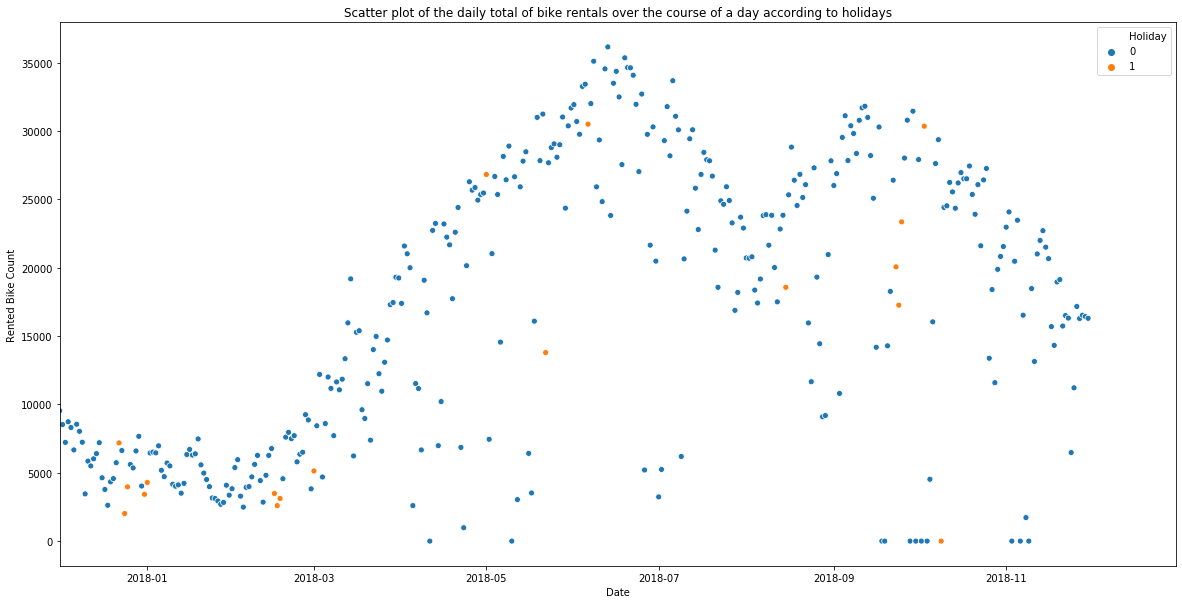

In [51]:
plt.figure(figsize=(20,10))
ax=seaborn.scatterplot(data=df, x="Date", y="Rented Bike Count", hue="Holiday")
ax.set(xlim = ('2017-12-01', '2018-12-31'))
plt.title("Scatter plot of the daily total of bike rentals over the course of a day according to holidays")
plt.show()


*Holiday* feature seems to not affect the daily mean of rentals.

In [52]:
df1 = seoul_bike.groupby('Date')['Rented Bike Count'].sum().reset_index()
df2 = seoul_bike.groupby('Date')['Functioning Day'].first().reset_index()

In [53]:
df = df1.merge(df2)
df

,Date,Rented Bike Count,Functioning Day
0,2017-12-01,9539,1
1,2017-12-02,8523,1
2,2017-12-03,7222,1
3,2017-12-04,8729,1
4,2017-12-05,8307,1
...,...,...,...
360,2018-11-26,17162,1
361,2018-11-27,16282,1
362,2018-11-28,16524,1
363,2018-11-29,16423,1


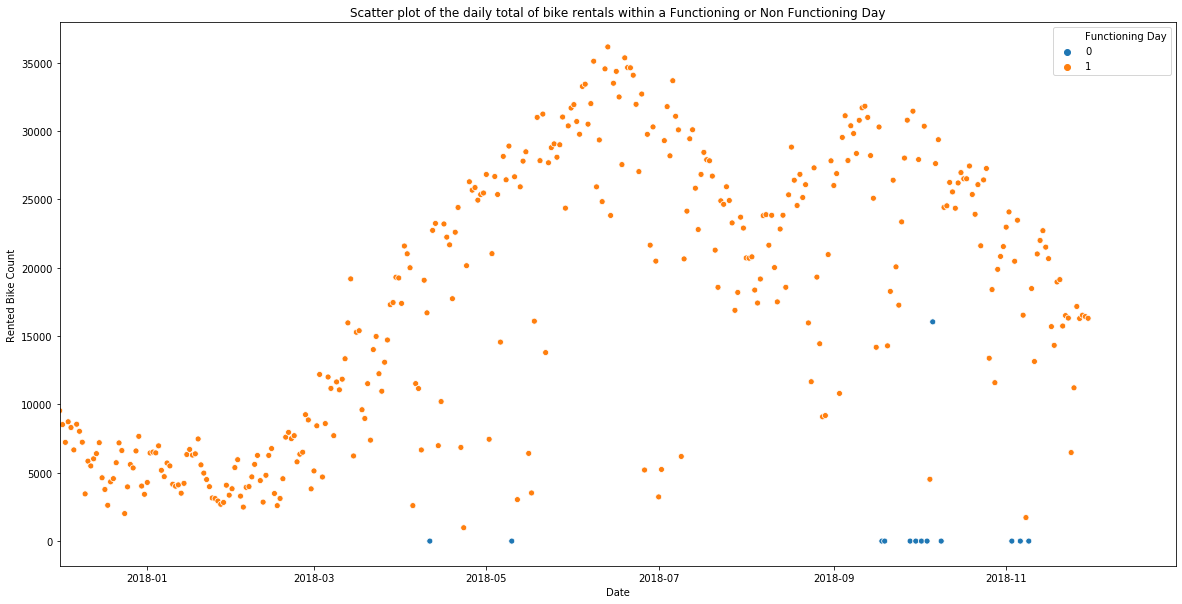

In [54]:
plt.figure(figsize=(20,10))
ax=seaborn.scatterplot(data=df, x="Date", y="Rented Bike Count", hue="Functioning Day")
ax.set(xlim = ('2017-12-01', '2018-12-31'))
plt.title("Scatter plot of the daily total of bike rentals within a Functioning or Non Functioning Day")

plt.show()

In Non Functional Days, people don't rent bikes.

### Monthly Evolution of bike rental in Seoul

**Total bike rentals per month**

In [55]:
rbc_month = seoul_bike['Rented Bike Count'].resample('m').sum().reset_index().set_index('Date')
rbc_month

,Rented Bike Count
Date,
2017-12-31,185330
2018-01-31,150006
2018-02-28,151833
2018-03-31,380594
2018-04-30,524227
2018-05-31,707088
2018-06-30,896887
2018-07-31,734460
2018-08-31,651887


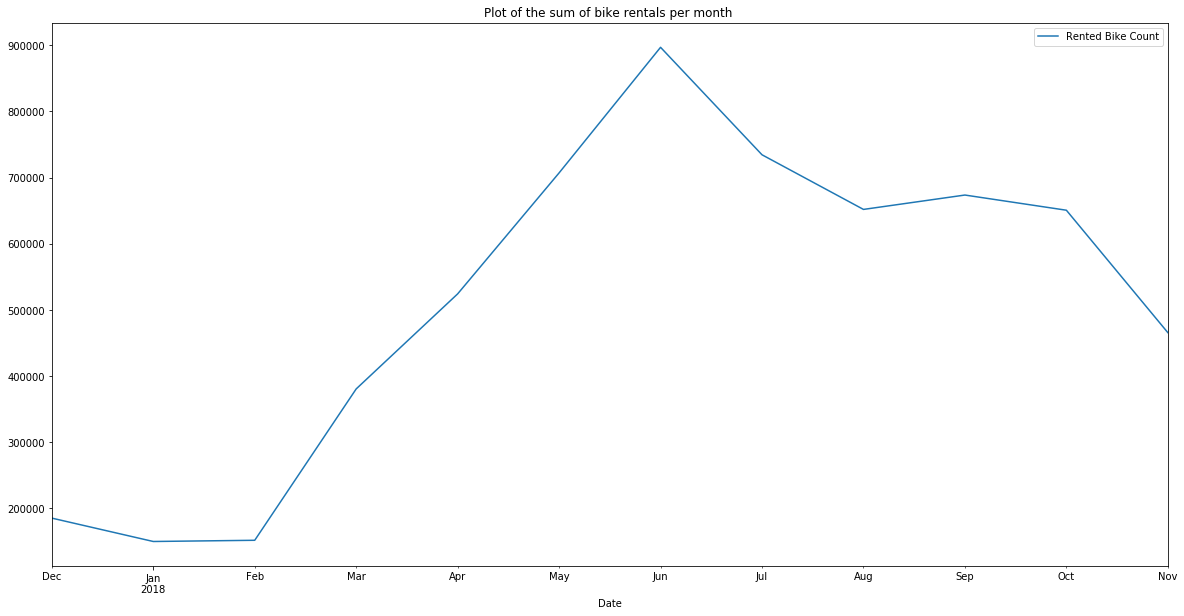

In [56]:
rbc_month.plot(figsize = (20,10))
plt.title("Plot of the sum of bike rentals per month ")
plt.show()

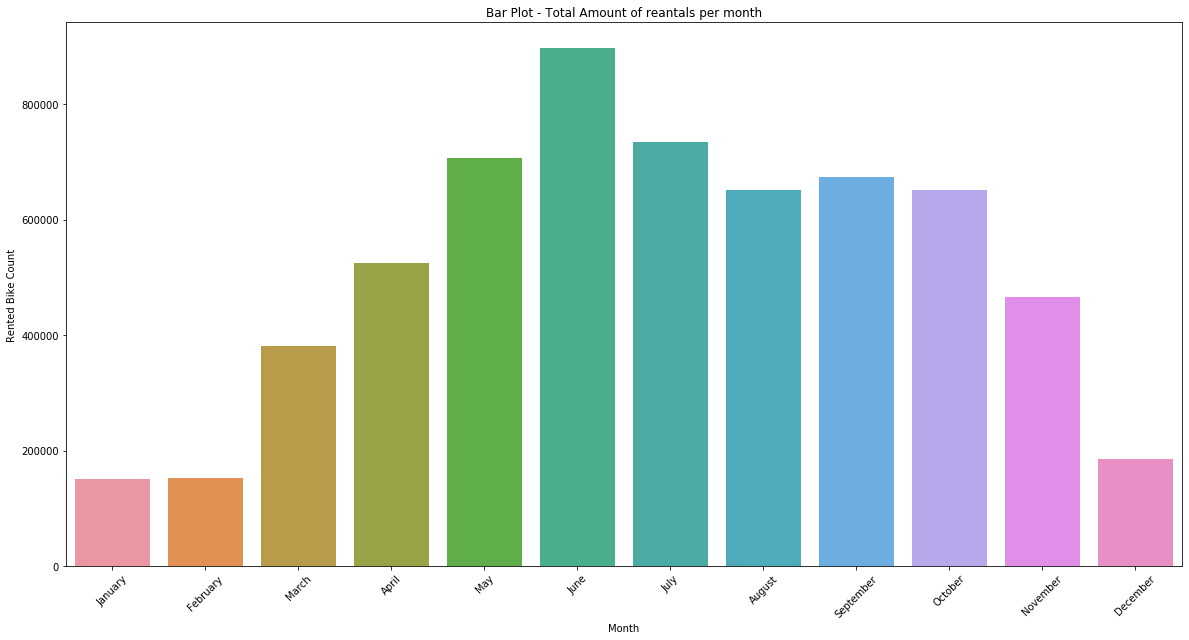

In [57]:
fig, ax = plt.subplots(figsize = (20,10))

labels = 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
seaborn.barplot(x=rbc_month.index.month,y=rbc_month['Rented Bike Count'],ax=ax)

ax.set_xticklabels(labels, rotation=45)
ax.set_xlabel("Month")
plt.title("Bar Plot - Total Amount of reantals per month")
plt.show()

**Total bike rentals per month according to the monthly mean temperature**

In [58]:
mean_temperature_month = seoul_bike['Temperature(°C)'].resample('m').mean().reset_index().set_index('Date')
df = pd.concat([mean_temperature_month, rbc_month], axis=1).reset_index().set_index('Date')
df

,Temperature(°C),Rented Bike Count
Date,,
2017-12-31,-1.928763,185330
2018-01-31,-3.943145,150006
2018-02-28,-1.664732,151833
2018-03-31,8.044489,380594
2018-04-30,12.948056,524227
2018-05-31,18.144355,707088
2018-06-30,23.136806,896887
2018-07-31,27.763978,734460
2018-08-31,28.736425,651887


In [59]:
df.describe()

,Temperature(°C),Rented Bike Count
count,12.000000,12.000000
mean,12.802863,514359.500000
std,11.453853,250012.561972
min,-3.943145,150006.000000
25%,5.440588,331778.000000
50%,13.018584,587451.000000
75%,21.908264,681981.000000
max,28.736425,896887.000000


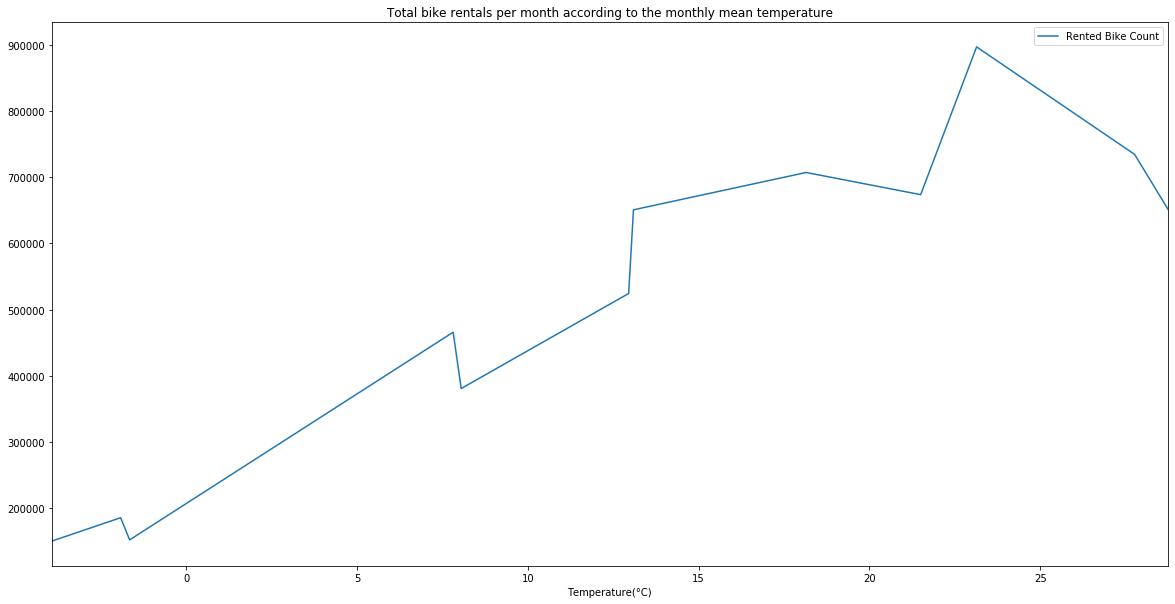

In [60]:
df_temp = df.sort_values(by='Temperature(°C)')
df_temp.plot(x="Temperature(°C)", y="Rented Bike Count", figsize = (20,10))
plt.title("Total bike rentals per month according to the monthly mean temperature")
plt.show()

**According to *Functionning Day* criteria**

In [61]:
df['Functioning Day'] = seoul_bike['Functioning Day'].resample('d').first().resample('m').sum()
df

,Temperature(°C),Rented Bike Count,Functioning Day
Date,,,
2017-12-31,-1.928763,185330,31
2018-01-31,-3.943145,150006,31
2018-02-28,-1.664732,151833,28
2018-03-31,8.044489,380594,31
2018-04-30,12.948056,524227,29
2018-05-31,18.144355,707088,30
2018-06-30,23.136806,896887,30
2018-07-31,27.763978,734460,31
2018-08-31,28.736425,651887,31


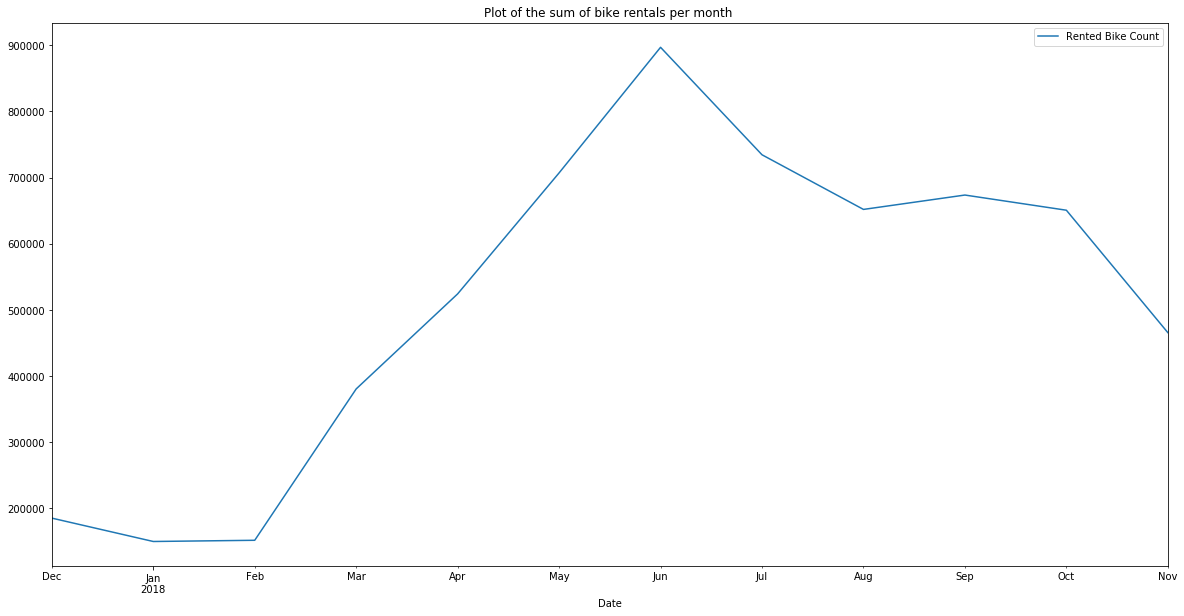

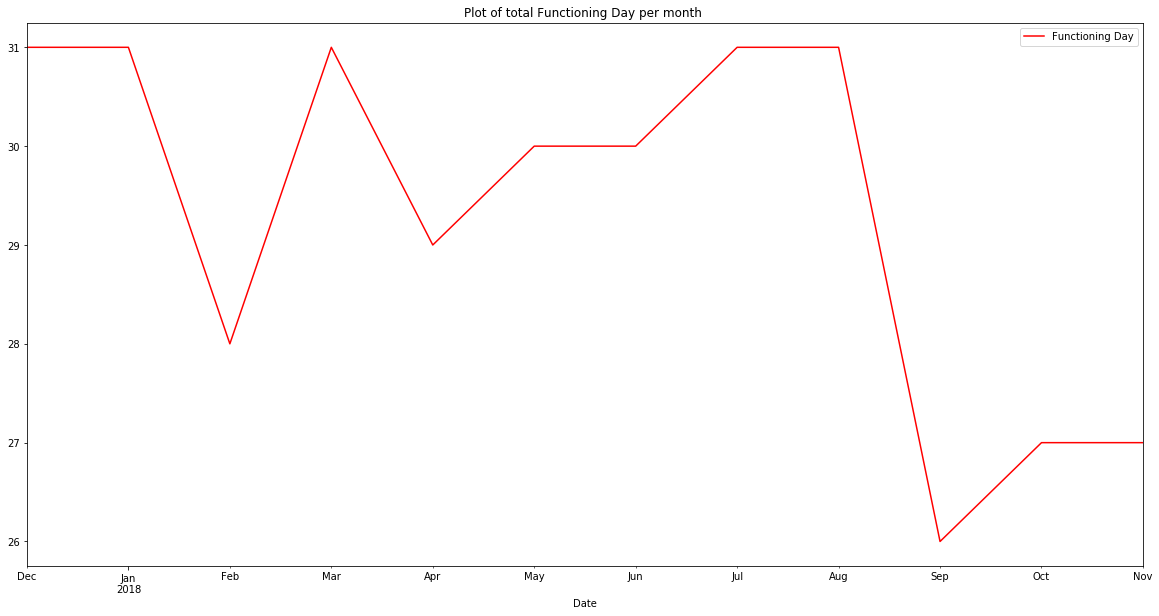

In [62]:
df.plot(kind='line',y='Rented Bike Count',figsize = (20,10))
plt.title("Plot of the sum of bike rentals per month ")
df.plot(kind='line',y='Functioning Day', color='red',figsize = (20,10))
plt.title("Plot of total Functioning Day per month ")

plt.show()

**According to *Holiday* criteria**

In [63]:
df['Holiday'] = seoul_bike['Holiday'].resample('d').first().resample('m').sum()
df

,Temperature(°C),Rented Bike Count,Functioning Day,Holiday
Date,,,,
2017-12-31,-1.928763,185330,31,4
2018-01-31,-3.943145,150006,31,1
2018-02-28,-1.664732,151833,28,3
2018-03-31,8.044489,380594,31,1
2018-04-30,12.948056,524227,29,0
2018-05-31,18.144355,707088,30,2
2018-06-30,23.136806,896887,30,1
2018-07-31,27.763978,734460,31,0
2018-08-31,28.736425,651887,31,1


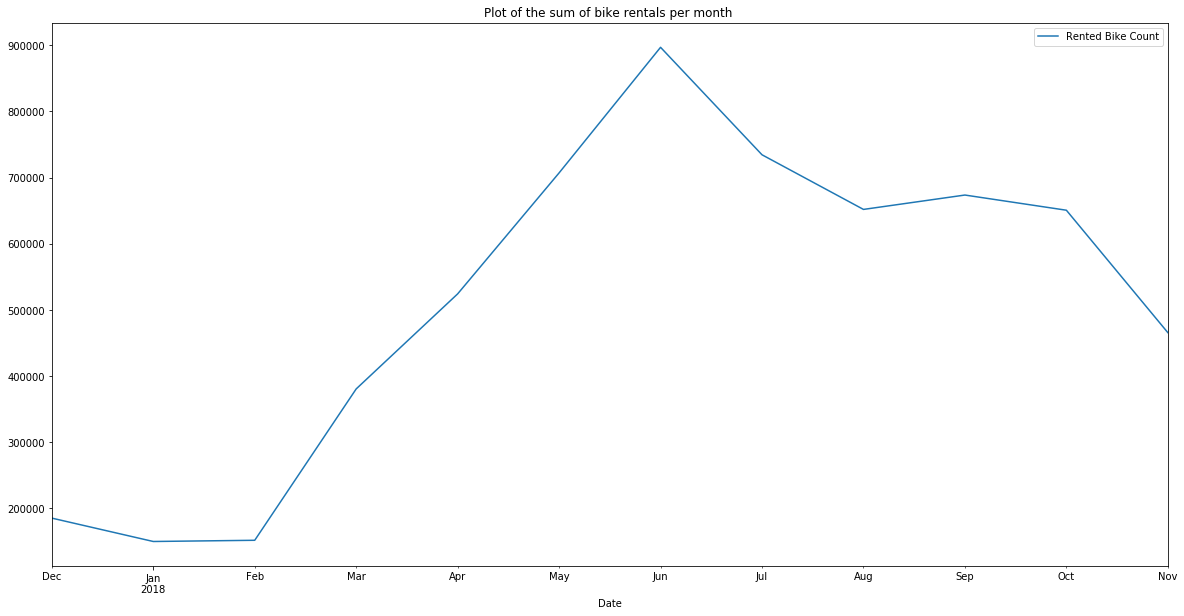

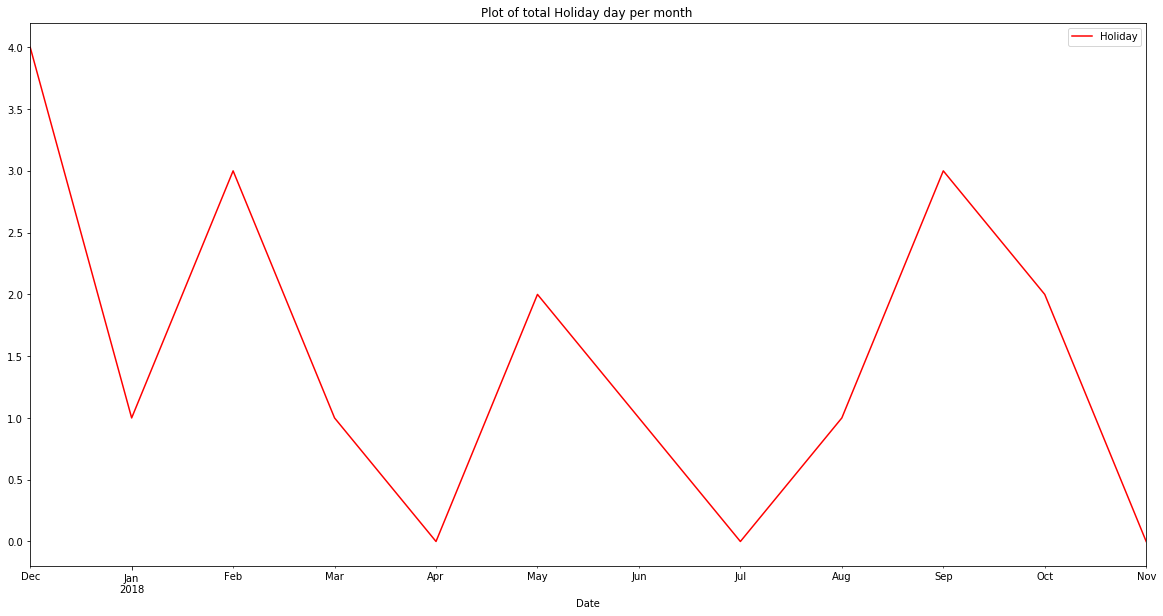

In [64]:
df.plot(kind='line',y='Rented Bike Count',figsize = (20,10))
plt.title("Plot of the sum of bike rentals per month ")
df.plot(kind='line',y='Holiday', color='red',figsize = (20,10))
plt.title("Plot of total Holiday day per month ")

plt.show()

*Functioning Day* and *Holiday* seem to be non significant features for monthly analysis.

### Seasonly Repartition of bike rental in Seoul

In [65]:
seasons_sum = seoul_bike.groupby("Seasons")["Rented Bike Count"].sum().reset_index()
seasons_sum

,Seasons,Rented Bike Count
0,1,487169
1,2,1611909
2,3,2283234
3,4,1790002


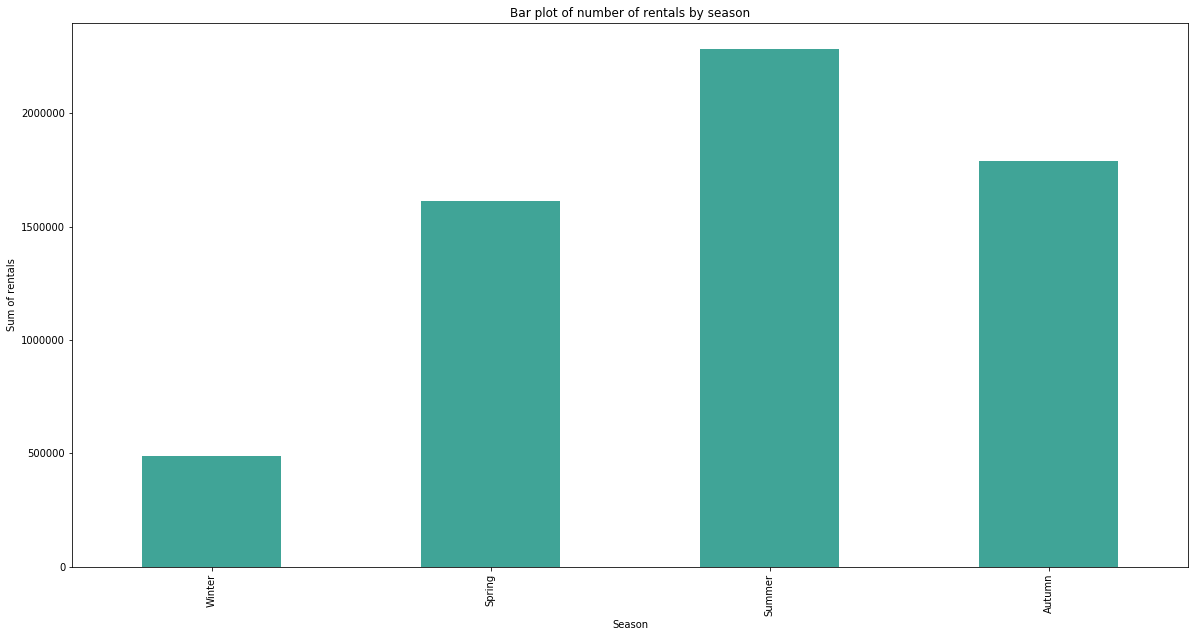

In [66]:
labels = 'Winter', 'Spring', 'Summer', 'Autumn'
sums = seasons_sum['Rented Bike Count']

# Plot the figure.
plt.figure(figsize=(20, 10))
fig = sums.plot(kind='bar',color='#40A497')
fig.set_title('Bar plot of number of rentals by season')
fig.set_xlabel('Season')
fig.set_ylabel('Sum of rentals')
fig.set_xticklabels(labels)
plt.show()

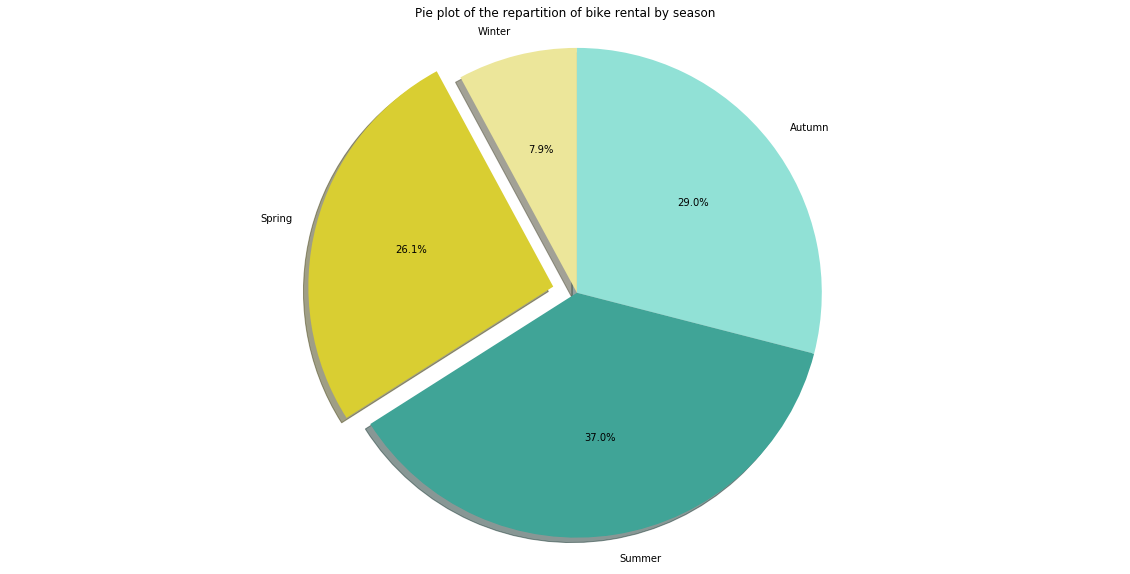

In [67]:
labels = 'Winter', 'Spring', 'Summer', 'Autumn'
sizes = seasons_sum['Rented Bike Count']
#add colors
colors = ['#ECE69A','#D9CE32','#40A497','#91E1D6']
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots(figsize=(20, 10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Pie plot of the repartition of bike rental by season")
plt.show()

Indeed, the number of bike rentals is much higher in summer and autumn, when temperatures are warmer. Temperatures seem to have an influence on bike rental in Seoul

### Hourly Evolution of bike rental in Seoul

In [68]:
seoul_bike

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,Year,Weekday
Date,,,,,,,,,,,,,,,,,
2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0,1,12,1,2017,5
2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,1,12,1,2017,5
2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0,1,12,1,2017,5
2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0,1,12,1,2017,5
2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0,1,12,1,2017,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,4,0,1,11,30,2018,5
2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,4,0,1,11,30,2018,5
2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,4,0,1,11,30,2018,5


**5 maximal values of Rented Bike Count by day :**

In [69]:
def get_top5(df, column='Rented Bike Count'):
  return df.sort_values(by=column)[-5:]

In [70]:
seoul_bike.groupby(['Month','Day']).apply(get_top5).head(15)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
Month Day Date                                                                
1     1   2018-01-01                248    13              2.4           22   
          2018-01-01                271    17              1.8           33   
          2018-01-01                298    14              3.7           24   
          2018-01-01                310    16              3.0           28   
          2018-01-01                344    15              3.0           27   
      2   2018-01-02                364    20             -1.9           26   
          2018-01-02                373    17              0.3           27   
          2018-01-02                403    19             -1.3           28   
          2018-01-02                655     8             -3.4           71   
          2018-01-02                675    18             -0.8           24   
      3   2018-01-03                342     9             -6.8           44   
          2018-01-03                382    17             -1.9           35   
          2018-01-03                431    19             -3.7           41   
          2018-01-03                637    18             -3.1           39   
          2018-01-03                670     8             -7.0           49   

                      Wind speed (m/s)  Visibility (10m)  \
Month Day Date                                             
1     1   2018-01-01               2.3              1921   
          2018-01-01               3.3              1913   
          2018-01-01               2.1              1906   
          2018-01-01               2.5              1864   
          2018-01-01               2.9              1715   
      2   2018-01-02               2.2              2000   
          2018-01-02               2.6              2000   
          2018-01-02               2.4              2000   
          2018-01-02               0.8              1179   
          2018-01-02               2.3              2000   
      3   2018-01-03               1.7              1858   
          2018-01-03               1.8              2000   
          2018-01-03               2.0              2000   
          2018-01-03               2.1              2000   
          2018-01-03               1.5              1971   

                      Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
Month Day Date                                                             
1     1   2018-01-01                      -17.2                     1.10   
          2018-01-01                      -12.8                     0.18   
          2018-01-01                      -15.0                     1.01   
          2018-01-01                      -13.7                     0.51   
          2018-01-01                      -14.2                     0.78   
      2   2018-01-02                      -18.9                     0.00   
          2018-01-02                      -16.5                     0.18   
          2018-01-02                      -17.5                     0.00   
          2018-01-02                       -7.9                     0.00   
          2018-01-02                      -18.9                     0.01   
      3   2018-01-03                      -17.0                     0.16   
          2018-01-03                      -15.3                     0.25   
          2018-01-03                      -15.0                     0.00   
          2018-01-03                      -15.1                     0.00   
          2018-01-03                      -15.9                     0.00   

                      Rainfall(mm)  Snowfall (cm)  Seasons  Holiday  \
Month Day Date                                                        
1     1   2018-01-01           0.0            0.0        1        1   
          2018-01-01           0.0            0.0        1        1   
          2018-01-01           0.0            0.0        1        1   
         

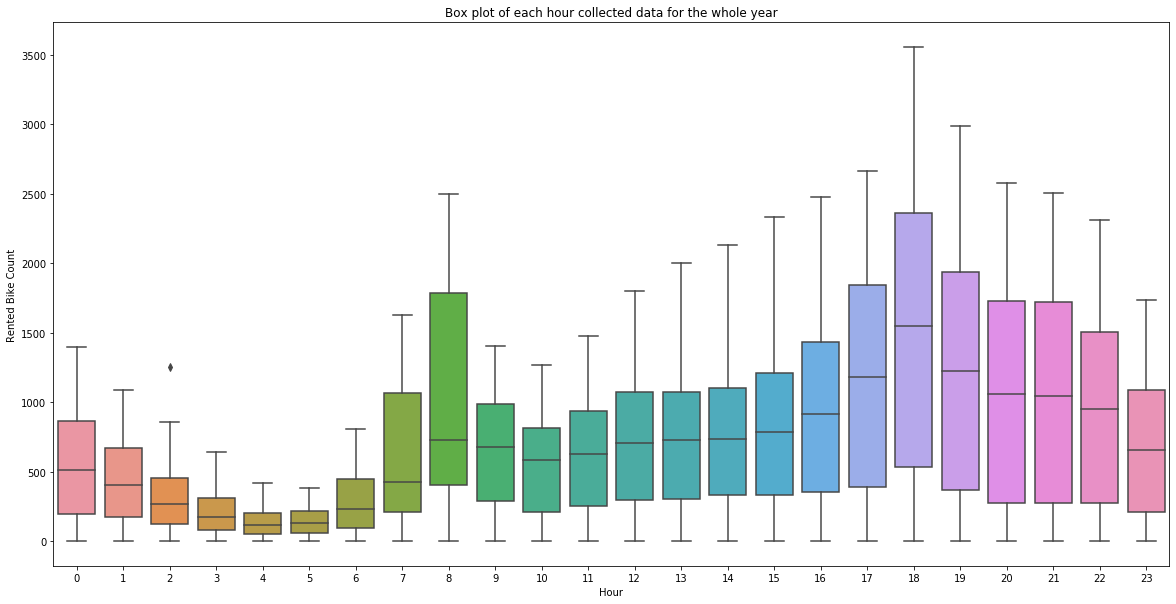

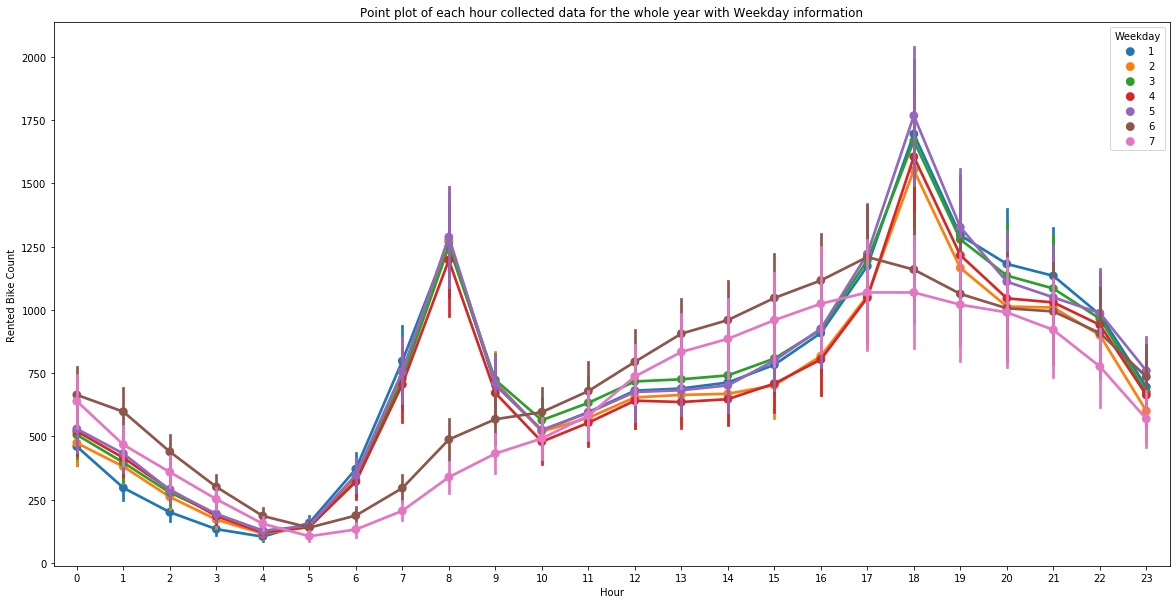

In [71]:
plt.figure(figsize=(20,10))
seaborn.boxplot(x='Hour',y='Rented Bike Count', data=seoul_bike)
plt.title("Box plot of each hour collected data for the whole year")
plt.figure(figsize=(20,10))
seaborn.pointplot(data=seoul_bike, x = "Hour", y = "Rented Bike Count", hue = "Weekday", join = True)
plt.title("Point plot of each hour collected data for the whole year with Weekday information")
plt.show()

-During peak hours the rentals are more important. It can be assumed that bike rentals are more in demand for business trips and to get to school.  

-On Friday at 6pm, this is the moment when people rent bikes the most.

## Preprocessing

In [72]:
seoul_bike.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,Year,Weekday
Rented Bike Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,3.596867e-01,-7.233757e-02,0.203943,1.335139e-01,2.229091e-02,0.215162,-2.935728e-02
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,1.577301e-19,1.691160e-20,0.005439,2.378988e-19,4.848940e-18,0.000000,-1.906089e-19
Temperature(°C),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,5.915453e-01,-5.593084e-02,-0.050170,2.161826e-01,1.564544e-02,0.377796,-3.367631e-03
Humidity(%),-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,1.892379e-01,-5.027765e-02,-0.020800,1.398748e-01,-2.904392e-02,0.035925,-7.619862e-03
Wind speed (m/s),0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-1.668339e-01,2.301677e-02,0.005037,-1.567102e-01,-3.197744e-02,-0.003781,-2.143759e-02
Visibility (10m),0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,1.119742e-01,3.177281e-02,-0.026000,6.487420e-02,-1.017585e-01,0.052381,-2.619092e-02
Dew point temperature(°C),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,5.824180e-01,-6.675910e-02,-0.052837,2.425519e-01,1.525311e-04,0.336350,-1.378257e-02
Solar Radiation (MJ/m2),0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,9.468096e-02,-5.077255e-03,-0.007665,-3.159544e-02,-2.981839e-03,0.128086,1.058026e-02
Rainfall(mm),-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,3.345293e-02,-1.426911e-02,0.002055,1.195810e-02,-1.623338e-03,0.027522,-1.777046e-02
Snowfall (cm),-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,-1.454573e-01,-1.259072e-02,0.032089,5.312091e-02,1.020774e-01,-0.206418,-1.167029e-02


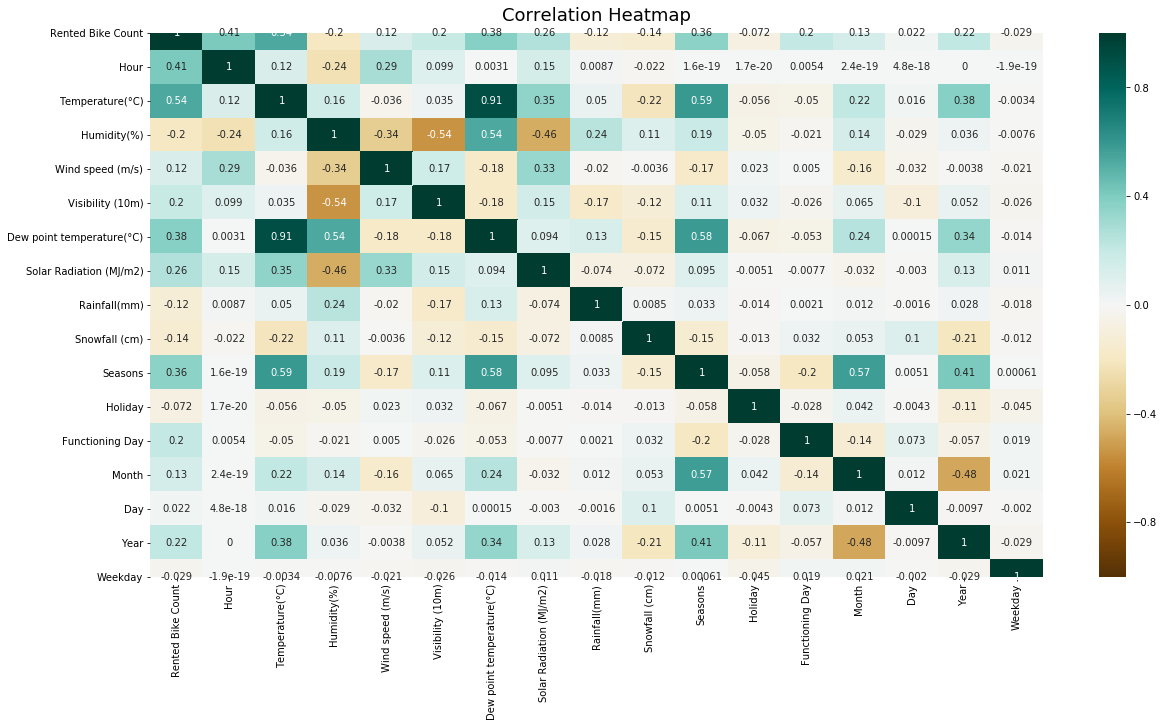

In [73]:
plt.figure(figsize=(20,10))
heatmap = seaborn.heatmap(seoul_bike.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

*Temperature(°C)* and *Dew point temperature(°C)* are very high correlated. To avoid redundant information, we may drop the second feature.

In [74]:
seoul_bike=seoul_bike.drop(["Dew point temperature(°C)"], axis=1)

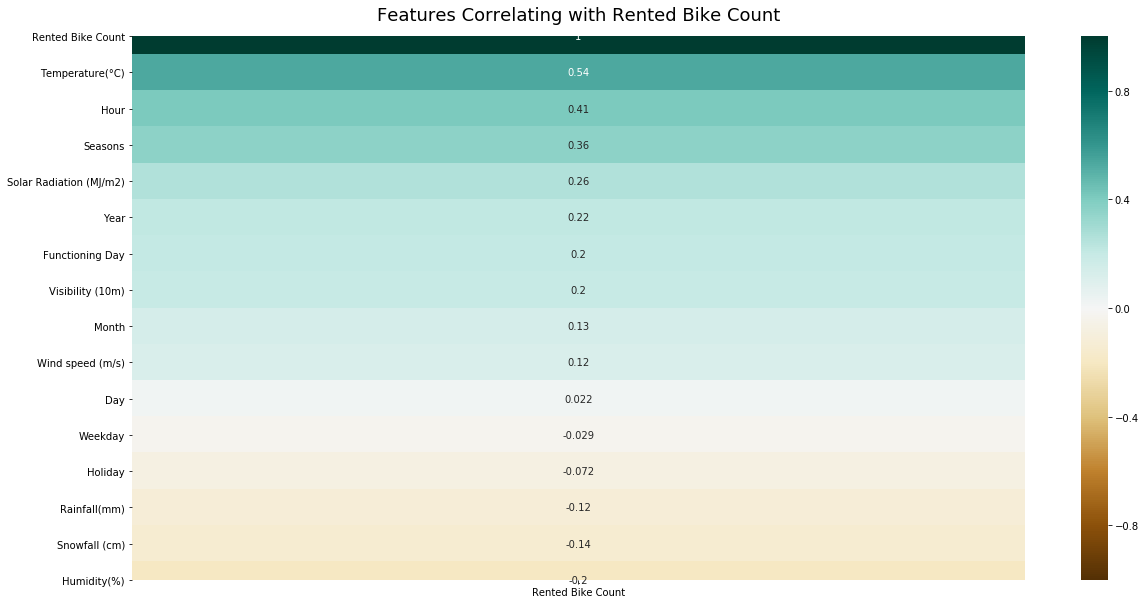

In [75]:
plt.figure(figsize=(20,10))
heatmap = seaborn.heatmap(seoul_bike.corr()[['Rented Bike Count']].sort_values(by='Rented Bike Count', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Rented Bike Count', fontdict={'fontsize':18}, pad=16);

*Solar Radiation (MJ/m2)*, *Rainfall(mm)*, *Snowfall (cm)*, and *Visibility (10m)*, all give information about the weather. So maybe it's better if we transform it into categorical features in order to create a new feature named *Weather Condition*.  
The different conditions are :
- 1: Sunny, Few Clouds - no Rain neither Snow
- 2: Lot of Clouds - no Rain neither Snow
- 3: Rain or Snow (exclusive)
- 4: Both Rain & Snow

In [76]:
seoul_bike['Solar Radiation (MJ/m2)'] = seoul_bike['Solar Radiation (MJ/m2)'].apply(lambda x: 1 if x >0 else 0)
seoul_bike['Rainfall(mm)'] = seoul_bike['Rainfall(mm)'].apply(lambda x: 1 if x >0 else 0)
seoul_bike['Snowfall (cm)'] = seoul_bike['Snowfall (cm)'].apply(lambda x: 1 if x >0 else 0)
seoul_bike.head(50)


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,Year,Weekday
Date,,,,,,,,,,,,,,,,
2017-12-01,254,0,-5.2,37,2.2,2000,0,0,0,1,0,1,12,1,2017,5
2017-12-01,204,1,-5.5,38,0.8,2000,0,0,0,1,0,1,12,1,2017,5
2017-12-01,173,2,-6.0,39,1.0,2000,0,0,0,1,0,1,12,1,2017,5
2017-12-01,107,3,-6.2,40,0.9,2000,0,0,0,1,0,1,12,1,2017,5
2017-12-01,78,4,-6.0,36,2.3,2000,0,0,0,1,0,1,12,1,2017,5
2017-12-01,100,5,-6.4,37,1.5,2000,0,0,0,1,0,1,12,1,2017,5
2017-12-01,181,6,-6.6,35,1.3,2000,0,0,0,1,0,1,12,1,2017,5
2017-12-01,460,7,-7.4,38,0.9,2000,0,0,0,1,0,1,12,1,2017,5
2017-12-01,930,8,-7.6,37,1.1,2000,1,0,0,1,0,1,12,1,2017,5


In [77]:
seoul_bike['Visibility (10m)'].describe()

count    8760.000000
mean     1436.825799
std       608.298712
min        27.000000
25%       940.000000
50%      1698.000000
75%      2000.000000
max      2000.000000
Name: Visibility (10m), dtype: float64

In [78]:
seoul_bike['Visibility (10m)'] = seoul_bike['Visibility (10m)'].apply(lambda x: 1 if x <= 500 else 2 if x <= 1000 else 3 if x <= 1500 else 4)
seoul_bike.head(50)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,Year,Weekday
Date,,,,,,,,,,,,,,,,
2017-12-01,254,0,-5.2,37,2.2,4,0,0,0,1,0,1,12,1,2017,5
2017-12-01,204,1,-5.5,38,0.8,4,0,0,0,1,0,1,12,1,2017,5
2017-12-01,173,2,-6.0,39,1.0,4,0,0,0,1,0,1,12,1,2017,5
2017-12-01,107,3,-6.2,40,0.9,4,0,0,0,1,0,1,12,1,2017,5
2017-12-01,78,4,-6.0,36,2.3,4,0,0,0,1,0,1,12,1,2017,5
2017-12-01,100,5,-6.4,37,1.5,4,0,0,0,1,0,1,12,1,2017,5
2017-12-01,181,6,-6.6,35,1.3,4,0,0,0,1,0,1,12,1,2017,5
2017-12-01,460,7,-7.4,38,0.9,4,0,0,0,1,0,1,12,1,2017,5
2017-12-01,930,8,-7.6,37,1.1,4,1,0,0,1,0,1,12,1,2017,5


In [79]:
seoul_bike.groupby(['Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']).size().reset_index().rename(columns={0:'count'})

,Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),count
0,1,0,0,0,446
1,1,0,0,1,73
2,1,0,1,0,117
3,1,0,1,1,16
4,1,1,0,0,283
5,1,1,0,1,29
6,1,1,1,0,98
7,1,1,1,1,2
8,2,0,0,0,536
9,2,0,0,1,48


In [80]:
def weather_condition(a,b,c,d):
  if ((a==4 or a==3) and c==0 and d==0) :
    return 1
  elif ((a==1 or a==2)  and c==0 and d==0):
    return 2
  elif ((c==0 and d==1) or (c==1 and d==0)):
    return 3
  else :
    return 4

seoul_bike['Weather Condition']=seoul_bike.apply(lambda x : weather_condition(x['Visibility (10m)'],x['Solar Radiation (MJ/m2)'],x['Rainfall(mm)'],x['Snowfall (cm)']),axis=1)

In [81]:
seoul_bike.reset_index(level=0, inplace=True) 

## Modelling

In [82]:
def print_time():
    """
    Affiche et retourne l'heure de la machine.
    Utilisé pour mesurer le temps d'execution du classifieur.
    """
    import time
    import datetime
    t = datetime.datetime.now().time()
    print(t.isoformat()[:8])
    return time.time()
print_time()

22:26:07


1610227567.399298

In [83]:
attributes = seoul_bike.drop(["Rented Bike Count","Date"], axis=1)
labels = seoul_bike['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(attributes.values, labels.values, test_size=0.33, random_state=0)

### Standardization 

In [84]:
"""
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)                 # Il ne faut fiter que sur les data d'entrainement
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)  # apply same transformation to test data
"""

### Linear Regression

In [85]:
start_time = print_time()
algo = linear_model.LinearRegression()
print('Fitting Model...........')
fit = algo.fit(X_train, y_train)
y_pred = fit.predict(X_train)
end_time = print_time()
score = r2_score(y_train, y_pred)

print('Score for Linear Regression Model : ', score)

print("\nDuration time :", end_time - start_time)

22:26:07
Fitting Model...........
22:26:07
Score for Linear Regression Model :  0.5726484213215767

Duration time : 0.006980180740356445


In [86]:
lr_score = score

### Lasso

In [87]:
start_time = print_time()
algo = Lasso()
params = {  "max_iter" : [ 500, 1000 ]              ,
            "alpha"     : [ 0.001,0.01,0.02,0.025,0.05,0.1,0.25,0.5,0.8,1.0 ]                    , 
            "selection" : ["random", "cyclic"]    }

grid   = GridSearchCV(algo, params, scoring='r2')
grid.fit(X_train, y_train)
end_time = print_time()

print('Best score for Lasso Model : ', grid.best_score_)
print('With parameters :\n', 'max_iter : ', grid.best_params_["max_iter"], '\n alpha : ', grid.best_params_["alpha"],
      '\n selection : ', grid.best_params_["selection"])

print("\nDuration time :", end_time - start_time)

22:26:07
22:26:09
Best score for Lasso Model :  0.5697063777133603
With parameters :
 max_iter :  500 
 alpha :  0.25 
 selection :  cyclic

Duration time : 1.9338335990905762


In [88]:
l_score = grid.best_score_

In [89]:
results = pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score')
pivot = pd.pivot_table(results, values='mean_test_score', index=['param_alpha', 'param_max_iter'], columns='param_selection')
pivot.style.background_gradient(cmap='BuGn')

### Random Forest

In [90]:
start_time = print_time()
algo = RandomForestRegressor()

params = {  "n_estimators"         : [ 10, 100, 200 ], 
            "min_samples_leaf"     : [  3,   1,   7 ],
            'max_depth'            : [60,70,80,90,100],
            'min_samples_split'    : [2,4,6,8],
            'bootstrap'            : [True,False]   }

grid   = GridSearchCV(algo, params, scoring='r2')
grid.fit(X_train, y_train)
end_time = print_time()

print('Best score for RandomForest Model : ', grid.best_score_)
print('With parameters :\n', 'n_estimators : ', grid.best_params_["n_estimators"], '\n min_samples_leaf : ', grid.best_params_["min_samples_leaf"],
      '\n max_depth : ', grid.best_params_["max_depth"], '\n min_samples_split : ', grid.best_params_["min_samples_split"],
      '\n bootstrap : ', grid.best_params_["bootstrap"] )

print("\nDuration time :", end_time - start_time)

22:26:09
22:48:02
Best score for RandomForest Model :  0.9161116424045678
With parameters :
 n_estimators :  200 
 min_samples_leaf :  1 
 max_depth :  90 
 min_samples_split :  2 
 bootstrap :  True

Duration time : 1312.839105606079


In [91]:
rf_score = grid.best_score_

In [92]:
results = pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score')

In [93]:
pivot = pd.pivot_table(results, values='mean_test_score', index=['param_n_estimators', 'param_max_depth'], columns='param_min_samples_leaf')
pivot.style.background_gradient(cmap='BuGn')

### Extra Trees

In [94]:
start_time = print_time()
algo = ExtraTreesRegressor()

parameters = {  "n_estimators"         : [ 10, 100, 200 ], 
                "min_samples_leaf"     : [  3,   1,   7 ],
                'max_depth'            : [60,70,80,90,100],
                'min_samples_split'    : [2,4,6,8],
                'bootstrap'            : [True,False]   }

grid   = GridSearchCV(algo, parameters, scoring='r2')
grid.fit(X_train, y_train)
end_time = print_time()

print('Best score for Extra Trees Model : ', grid.best_score_)
print('With parameters :\n', 'n_estimators : ', grid.best_params_["n_estimators"], '\n min_samples_leaf : ', grid.best_params_["min_samples_leaf"],
      '\n max_depth : ', grid.best_params_["max_depth"], '\n min_samples_split : ', grid.best_params_["min_samples_split"],
      '\n bootstrap : ', grid.best_params_["bootstrap"] )

print("\nDuration time :", end_time - start_time)

22:48:02
22:58:43
Best score for Extra Trees Model :  0.9272394711409889
With parameters :
 n_estimators :  200 
 min_samples_leaf :  1 
 max_depth :  60 
 min_samples_split :  4 
 bootstrap :  False

Duration time : 640.7353308200836


In [95]:
et_score = grid.best_score_

In [96]:
results = pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score')
pivot = pd.pivot_table(results, values='mean_test_score', index=['param_n_estimators', 'param_max_depth'], columns='param_min_samples_leaf')
pivot.style.background_gradient(cmap='BuGn')

### XGBoost 

In [97]:
start_time = print_time()
algo = XGBRegressor()
params = {  "max_depth" : [1, 5, 10, 60, 70, 80, 90, 100],
            "gamma"     : [0.5, 1, 1.1, 1.2, 1.5]   }
          
grid   = GridSearchCV(algo, params, scoring='r2')
grid.fit(X_train, y_train)
end_time = print_time()

print('Best score for XGBoost Model : ', grid.best_score_)
print('With parameters :\n', 'max_depth : ', grid.best_params_["max_depth"], '\n gamma : ', grid.best_params_["gamma"])
print ("\nDuration time :", end_time - start_time)

22:58:43
23:03:58
Best score for XGBoost Model :  0.9281447747914644
With parameters :
 max_depth :  5 
 gamma :  1

Duration time : 314.8577287197113


In [106]:
xgb_score = grid.best_score_

In [98]:
results = pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score')
pivot = pd.pivot_table(results, values='mean_test_score', index='param_max_depth', columns='param_gamma')
pivot.style.background_gradient(cmap='BuGn')

param_gamma,0.5,1.0,1.1,1.2,1.5
param_max_depth,,,,,
1,0.70185,0.70185,0.70185,0.70185,0.70185
5,0.928145,0.928145,0.928145,0.928145,0.928145
10,0.927199,0.926688,0.926636,0.926932,0.92691
60,0.919907,0.919716,0.919615,0.919705,0.919729
70,0.919907,0.919716,0.919615,0.919705,0.919729
80,0.919907,0.919716,0.919615,0.919705,0.919729
90,0.919907,0.919716,0.919615,0.919705,0.919729
100,0.919907,0.919716,0.919615,0.919705,0.919729


In [99]:
best = XGBRegressor(max_depth=10,gamma=1.5)
best.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=1.5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [100]:
y_pred = best.predict(X_test)

In [101]:
X_test[0]

array([-1.22469   , -0.17705103,  0.73505229, -0.40690599,  0.75225659,
       -1.0163199 , -0.25029405, -0.23046307, -0.44946212, -0.2246649 ,
        0.1834083 , -0.43985308,  0.37565314,  0.30416567,  1.00688481,
       -0.62218429])

In [102]:
test = [[16, 18, 23, 2.3, 3, 1, 0, 0, 2, 0, 1, 4, 15, 2019, 1, 1]]

In [103]:
best.score(X_test, y_test)

0.9457545824970196

### Comparison

In [107]:
labels = 'Linear Regression', 'Lasso', 'Random Forest', 'Extra Trees', 'XGBoost'
values = [lr_score, l_score, rf_score, et_score, xgb_score]

df_scores = pd.DataFrame({'Model':labels,'Score':values}).sort_values(by='Score')
df_scores.style.background_gradient(cmap='BuGn')

,Model,Score
0,Linear Regression,0.572648
1,Lasso,0.569706
2,Random Forest,0.916112
3,Extra Trees,0.927239
4,XGBoost,0.928145


## API

In [108]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [112]:
import pickle
pickle.dump(best, open('model.pkl', 'wb'))

In [113]:
model=pickle.load(open("model.pkl",'rb'))

In [114]:
model.predict(np.array([[16, 18, 23, 2.3, 3, 1, 0, 0, 2, 0, 1, 4, 15, 2019, 1, 1]]))[0]

143.92256